In [1]:
import numpy as np
from torchvision import transforms
from utils.dataset import NumpyCardiacImageMeshDataset, alignMeshWithImage, PadToShape, ToTensor, AugColor,SampleRoIVal, ToTensorForTestRoI, ToTensorForTest
from utils.dataset import RandomScale_XY_LAX

faces = np.load("/home/ngaggion/DATA/HybridGNet3D/Dataset/Meshes/DownsampledMeshes_files/faces_fhm_numpy.npy")
file = "/home/ngaggion/DATA/HybridGNet3D/Code/files/train_test_splits/test_surface_splits.csv"

#dataset = NumpyCardiacImageMeshDataset(file, faces, 
#                                        transform = transforms.Compose([alignMeshWithImage(),
#                                                                        SampleRoIVal([100, 100, 16]),
#                                                                        ToTensorForTestRoI()
#                                                                    ]))

dataset = NumpyCardiacImageMeshDataset(file, faces, 
                                        transform = transforms.Compose([alignMeshWithImage(),
                                                                        RandomScale_XY_LAX(),
                                                                        PadToShape([210, 210, 16]),
                                                                        ToTensorForTest()
                                                                    ]))

        

/home/ngaggion/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mode:  None
Total subjects: 600
Total pairs of images with annotations: 1200


torch.Size([1, 16, 210, 210])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
tensor(0.) tensor(0.9689)
tensor(0.) tensor(0.9844)
tensor(0.) tensor(0.9411)
tensor(0.) tensor(0.9430)


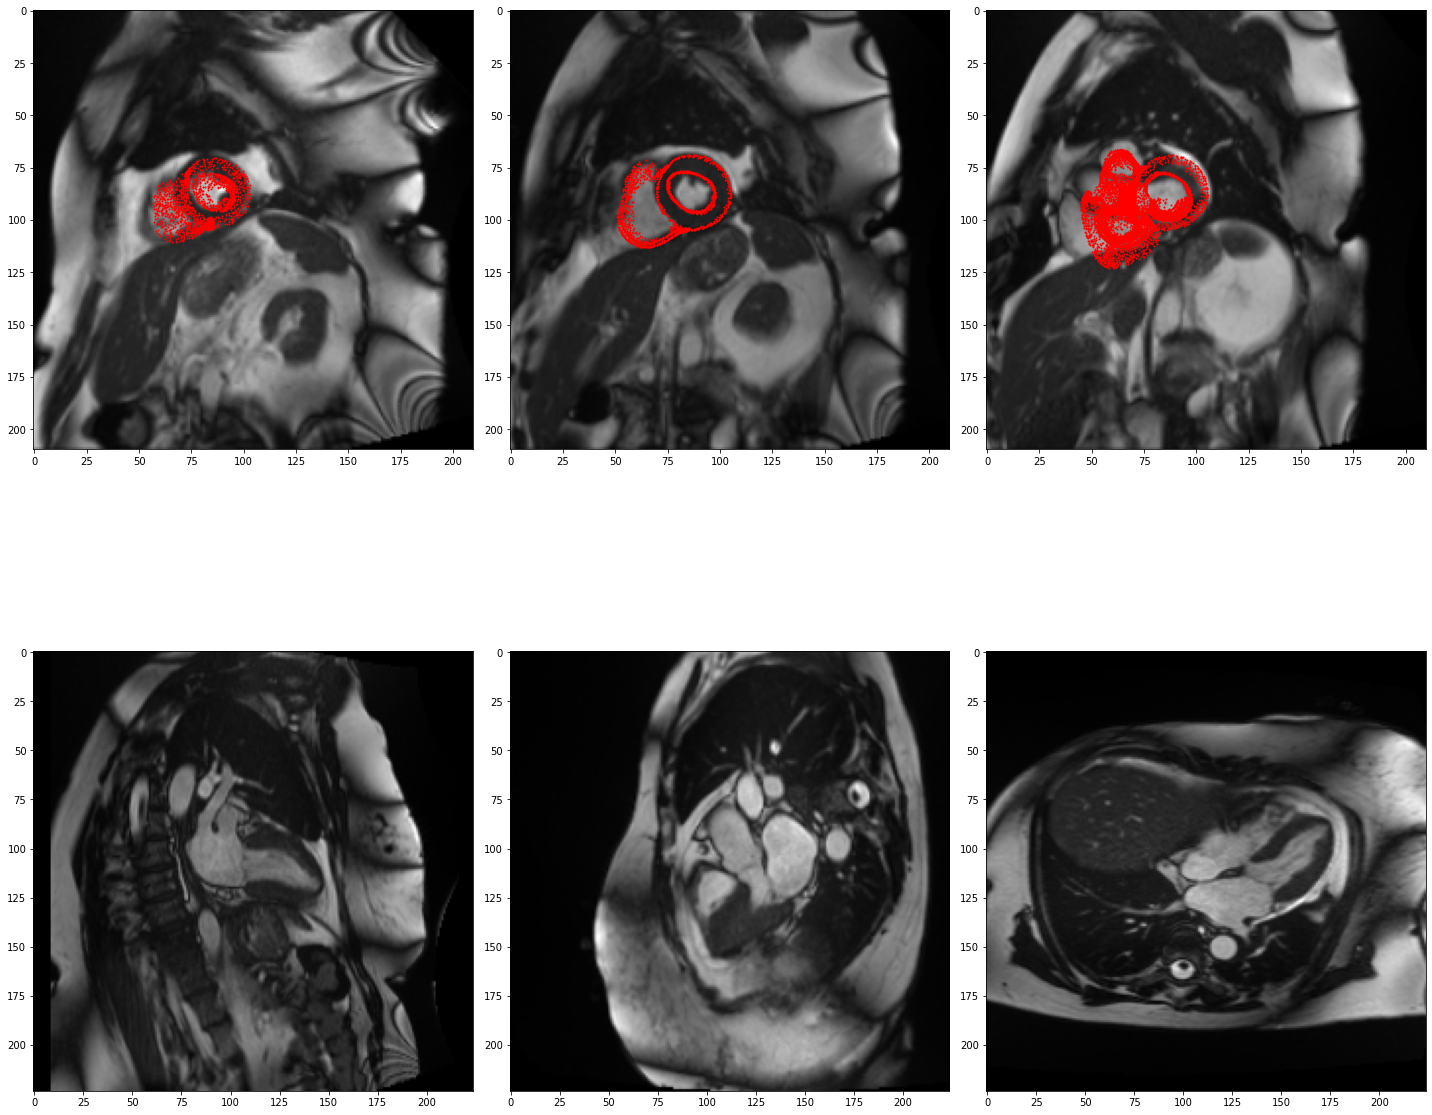

In [2]:
def go_back(config, image, mesh_v, x0=0, y0=0):
    # Scales and translates mesh vertices back to original image space
    def get_both_paddings(desired, actual):
        pad = desired - actual
        v1, v2 = pad // 2, pad // 2
        if v1 + v2 < pad:
            v2 += 1
        return v1, v2

    outh, outw = config['h'], config['w']
    z = image.num_slices
    dz = get_both_paddings(16, z)

    mesh_v[:, 0] = (mesh_v[:, 0] * outh + x0) * image.spacing[0] + image.origin[0]
    mesh_v[:, 1] = (mesh_v[:, 1] * outw + y0) * image.spacing[1] + image.origin[1]
    mesh_v[:, 2] = (mesh_v[:, 2] * 16 - dz[0]) * image.slice_gap + image.origin[2]

    return mesh_v

sample = dataset[0]

print(sample["array"].shape)
print(sample["LAX2CH"].shape)
print(sample["LAX3CH"].shape)
print(sample["LAX4CH"].shape)

import matplotlib.pyplot as plt

mesh = sample["mesh"].v

m1 = mesh[:,2] < (7 / 16) * (mesh[:,2] > (5 / 16))
m1 = mesh[m1,:] * 210

m2 = mesh[:,2] < (9 / 16) * (mesh[:,2] > (7 / 16))
m2 = mesh[m2,:] * 210

m3 = mesh[:,2] < (11 / 16) * (mesh[:,2] > (9 / 16))
m3 = mesh[m3,:] * 210

print(sample["array"].min(), sample["array"].max())
print(sample["LAX2CH"].min(), sample["LAX2CH"].max())
print(sample["LAX3CH"].min(), sample["LAX3CH"].max())
print(sample["LAX4CH"].min(), sample["LAX4CH"].max())

plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.imshow(sample["array"][0,7,:,:].cpu().numpy(), cmap="gray")
plt.scatter(m1[:,0], m1[:,1], s=1, c="red")

plt.subplot(2,3,2)
plt.imshow(sample["array"][0,9,:,:].cpu().numpy(), cmap="gray")
plt.scatter(m2[:,0], m2[:,1], s=1, c="red")

plt.subplot(2,3,3)
plt.imshow(sample["array"][0,11,:,:].cpu().numpy(), cmap="gray")
plt.scatter(m3[:,0], m3[:,1], s=1, c="red")

plt.subplot(2,3,4)
plt.imshow(sample["LAX2CH"][0,:,:].cpu().numpy(), cmap="gray")

plt.subplot(2,3,5)
plt.imshow(sample["LAX3CH"][0,:,:].cpu().numpy(), cmap="gray")

plt.subplot(2,3,6)
plt.imshow(sample["LAX4CH"][0,:,:].cpu().numpy(), cmap="gray")

plt.tight_layout()